<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/EDA_of_CPU_Utilization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import numpy as np

In [ ]:
data2023 = pd.read_csv("/content/CPU_Utilization_2023_Data.csv")
data2023.head()

In [ ]:
data2024 = pd.read_csv("/content/CPU_Utilization_2024_Data.csv")
data2024.head()

In [ ]:
df_merged = pd.concat([data2023, data2024], ignore_index=True)

In [ ]:
df_merged.shape

In [ ]:
df_merged.describe()

In [ ]:
df_merged.info()

In [ ]:
df_merged [' total'] = df_merged ['[xBackground__]'] + df_merged ['[xInteractive__]']

In [ ]:
df_merged.head()

In [ ]:
import pandas as pd

# Assuming your original DataFrame is named "df_merged"
# Convert the "TimePoints[TimePoint]" column to datetime
df_merged['TimePoints[TimePoint]'] = pd.to_datetime(df_merged['TimePoints[TimePoint]'], format='%d/%m/%Y %H:%M:%S')

# Group by 10-minute intervals and calculate the maximum "total" value
grouped = df_merged.groupby(pd.Grouper(key='TimePoints[TimePoint]', freq='10Min'))[' total'].max()

# Create a new DataFrame with the grouped intervals and maximum values
result_df = pd.DataFrame({
    'Interval Start': grouped.index,
    'Max Total': grouped.values
})

# Save the result to a CSV file
result_df.to_csv('grouped_intervals.csv', index=False)

# Print the first few rows of the result DataFrame
print(result_df.head())


In [2]:
grouped_intervals = pd.read_csv("/content/grouped_intervals.csv")
grouped_intervals.head()

,Interval Start,Max Total
0,2023-04-14 00:00:00,0.000138
1,2023-04-14 00:10:00,0.000138
2,2023-04-14 00:20:00,0.051037
3,2023-04-14 00:30:00,0.042937
4,2023-04-14 00:40:00,0.031671


In [3]:
grouped_intervals.shape

(56448, 2)

In [4]:
result_df['Status'] = result_df['Max Total'].apply(lambda x: 'Overflow' if x >= 1 else 'Normal')

# Print the updated DataFrame
print(result_df.head())

NameError: name 'result_df' is not defined

In [ ]:
result_df.to_csv('grouped_intervals_with_status.csv', index=False)

In [ ]:
num_overflows = (result_df['Max Total'] >= 1).sum()
print(f"Total number of overflows: {num_overflows}")

In [ ]:
# Create a new DataFrame with overflow rows
overflow_df = result_df[result_df['Max Total'] >= 1]

# Save the overflow rows to a CSV file
overflow_df.to_csv('overflow_intervals.csv', index=False)

print("Overflow rows saved to 'overflow_intervals.csv'")

In [5]:
overflow_intervals = pd.read_csv("/content/overflow_intervals.csv")
overflow_intervals.head()

,Interval Start,Max Total,Status
0,2023-04-24 08:00:00,1.025500,Overflow
1,2023-04-25 09:10:00,1.247104,Overflow
2,2023-05-03 12:30:00,1.011079,Overflow
3,2023-05-08 07:30:00,1.298292,Overflow
4,2023-05-08 07:40:00,1.170842,Overflow


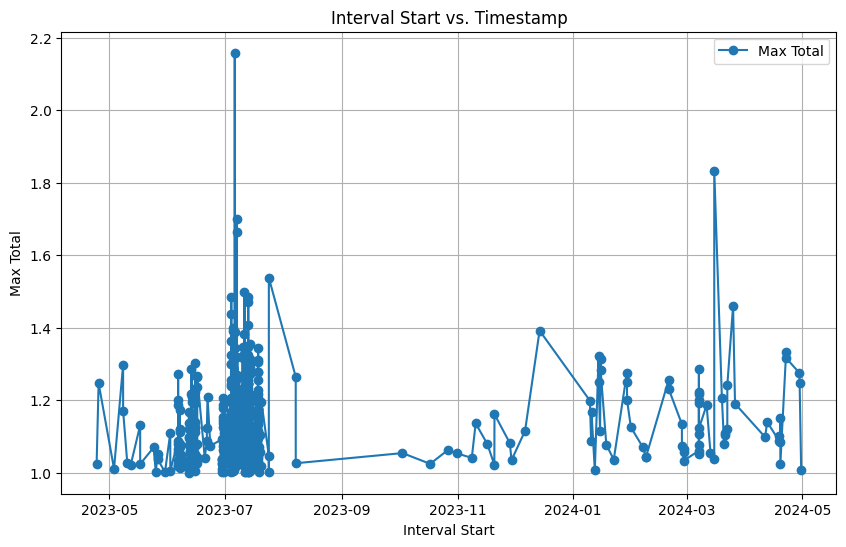

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "result_df" DataFrame from the previous steps
# Convert the "TimePoints[TimePoint]" column to datetime
overflow_intervals['Interval Start'] = pd.to_datetime(overflow_intervals['Interval Start'], format='%Y-%m-%d %H:%M:%S')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(overflow_intervals['Interval Start'], overflow_intervals['Max Total'], marker='o', label='Max Total')
plt.xlabel('Interval Start')
plt.ylabel('Max Total')
plt.title('Interval Start vs. Timestamp')
plt.grid(True)
plt.legend()
plt.show()


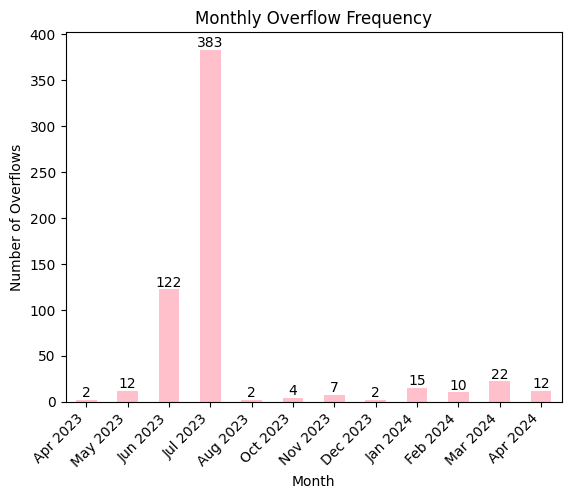

   Month Label  Number of Overflows
0     Apr 2023                    2
1     May 2023                   12
2     Jun 2023                  122
3     Jul 2023                  383
4     Aug 2023                    2
5     Oct 2023                    4
6     Nov 2023                    7
7     Dec 2023                    2
8     Jan 2024                   15
9     Feb 2024                   10
10    Mar 2024                   22
11    Apr 2024                   12


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the dataset (replace 'overflow_intervals.csv' with your actual data file)
df = pd.read_csv('overflow_intervals.csv')

# Convert 'Interval Start' column to datetime objects
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Extract year and month components
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month

# Exclude June (month number 6) and July (month number 7)
df_filtered = df[~df['Month'].isin([ ])]

# Keep only April 2023 (month number 4, year 2023) and exclude April 2024 (month number 4, year 2024)
df_filtered = df_filtered[(df_filtered['Month'] != 0) | (df_filtered['Year'] != 2024)]

# Group by year and month
Monthly_overflows = df_filtered.groupby(['Year', 'Month']).size()

# Create month labels
month_labels = [calendar.month_abbr[m] + ' ' + str(y) for y, m in Monthly_overflows.index]

# Plot monthly overflows
Monthly_overflows.plot(kind='bar', color='Pink')
plt.title('Monthly Overflow Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Overflows')
plt.xticks(range(len(month_labels)), month_labels, rotation=45, ha='right')

# Add value labels above each bar
for i, v in enumerate(Monthly_overflows):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

summary_df = pd.DataFrame(Monthly_overflows, columns=['Number of Overflows'])

# Reset index to make 'Year' and 'Month' separate columns
summary_df.reset_index(inplace=True)

# Add month labels
summary_df['Month Label'] = summary_df.apply(lambda row: calendar.month_abbr[row['Month']] + ' ' + str(row['Year']), axis=1)

# Display the summary
print(summary_df[['Month Label', 'Number of Overflows']])



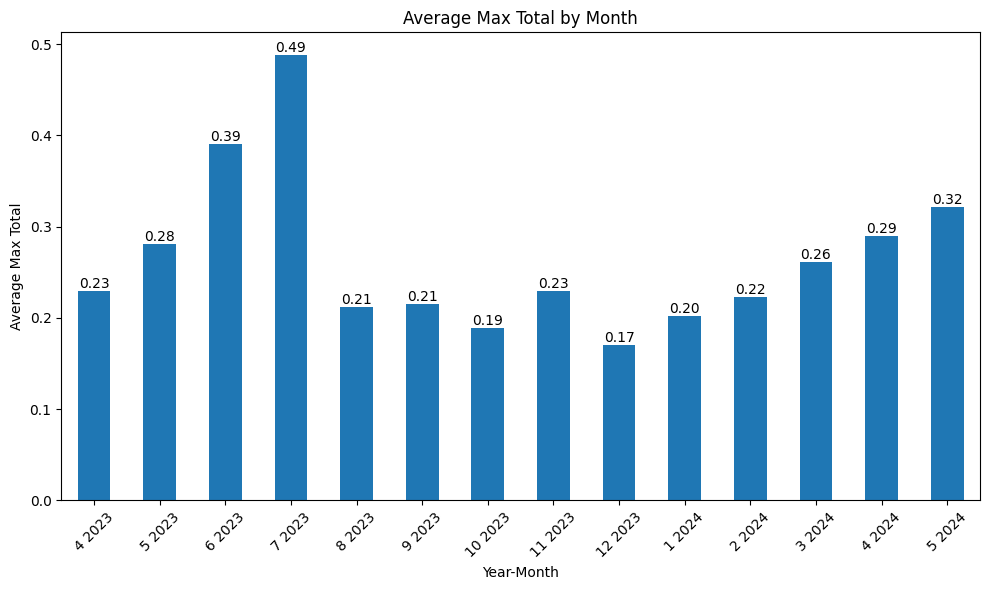

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the "overflow_columns" DataFrame
# Replace the following line with your actual data
df = pd.read_csv("/content/grouped_intervals.csv")

# Convert 'Interval Start' column to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Group by year and month, calculate average Max Total
average_max_total = df.groupby([df['Interval Start'].dt.year, df['Interval Start'].dt.month])['Max Total'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_max_total.plot(kind='bar', xlabel='Year-Month', ylabel='Average Max Total', title='Average Max Total by Month')

# Add labels to the bars
for i, value in enumerate(average_max_total):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(range(len(average_max_total)), [f'{month} {year}' for year, month in average_max_total.index], rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-9-38de4561c617>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby([df['Interval Start'].dt.year,


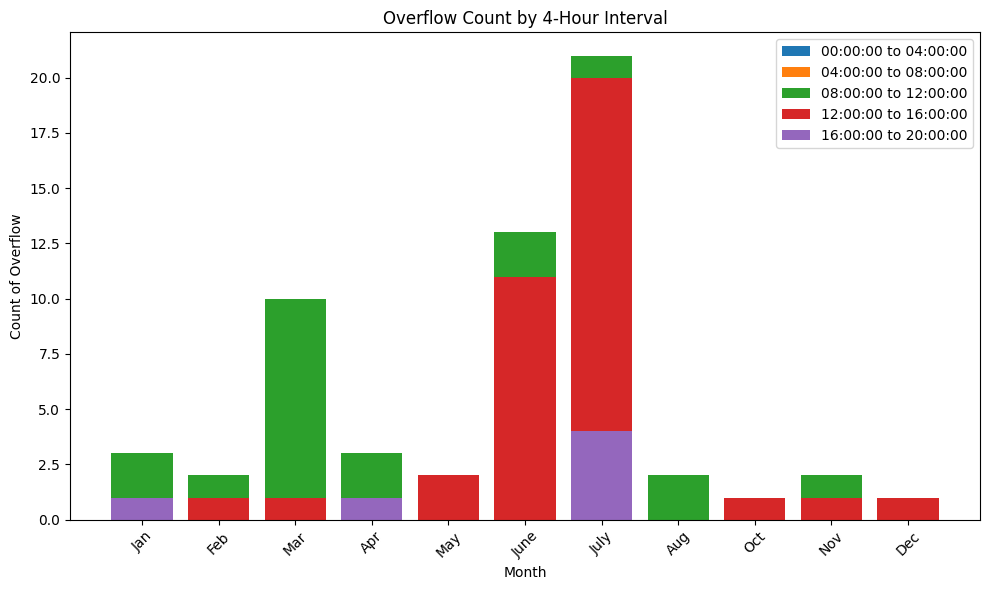

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset (replace 'path_to_overflow_columns.csv' with your actual file path)
df = pd.read_csv('/content/overflow_intervals.csv')

# Convert 'Interval Start' to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Define custom 4-hour intervals
intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='4H').time
interval_labels = [f'{intervals[i]} to {intervals[i+1]}' for i in range(len(intervals) - 1)]

# Extract the time component and convert it to seconds since midnight
df['time_seconds'] = df['Interval Start'].dt.hour * 3600 + df['Interval Start'].dt.minute * 60 + df['Interval Start'].dt.second

# Create a new column for 4-hour interval grouping using seconds since midnight
# Convert intervals to seconds for binning
interval_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in intervals]
df['4_hour_interval'] = pd.cut(df['time_seconds'], bins=interval_seconds, labels=interval_labels, right=False)

# Group by year, month, and day
df_grouped = df.groupby([df['Interval Start'].dt.year,
                         df['Interval Start'].dt.month,
                         df['Interval Start'].dt.day,
                         '4_hour_interval']).size().unstack(fill_value=0)

# Calculate the highest count of overload for each month
max_overload = df_grouped.groupby([df_grouped.index.get_level_values(0),
                                    df_grouped.index.get_level_values(1)]).max()

# Add month names (Jan, Feb, Mar) instead of numerical values
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}  # Add more months as needed
max_overload['Month'] = max_overload.index.get_level_values(1).map(month_names)

# Reorder columns
max_overload = max_overload[['Month'] + interval_labels]

# Plot the bar graph
plt.figure(figsize=(10, 6))
for interval in interval_labels:
    plt.bar(max_overload['Month'], max_overload[interval], label=interval)

plt.xlabel('Month')
plt.ylabel('Count of Overflow')
plt.title('Overflow Count by 4-Hour Interval')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to an image file (optional)
plt.savefig('overflow_count_plot.png')

# Show the plot
plt.show()

# Save the summary table to another CSV file
max_overload.to_csv('summary_table.csv', index=False)

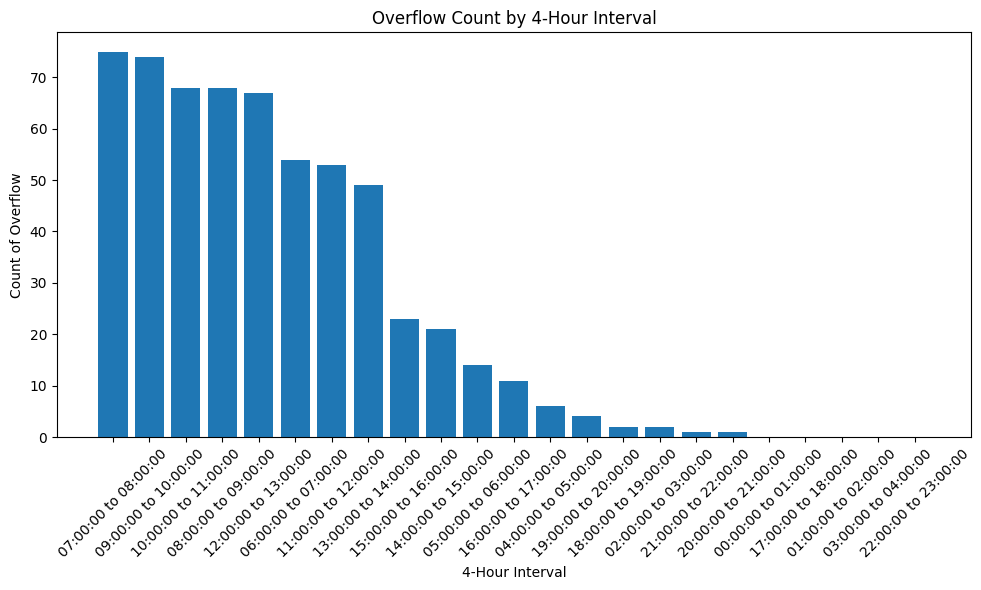

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset (replace 'path_to_overflow_columns.csv' with your actual file path)
df = pd.read_csv('/content/overflow_intervals.csv')

# Convert 'Interval Start' to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Define custom 4-hour intervals
intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='1H').time
interval_labels = [f'{intervals[i]} to {intervals[i+1]}' for i in range(len(intervals) - 1)]

# Extract the time component and convert it to seconds since midnight
df['time_seconds'] = df['Interval Start'].dt.hour * 3600 + df['Interval Start'].dt.minute * 60 + df['Interval Start'].dt.second

# Create a new column for 4-hour interval grouping using seconds since midnight
# Convert intervals to seconds for binning
interval_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in intervals]
df['4_hour_interval'] = pd.cut(df['time_seconds'], bins=interval_seconds, labels=interval_labels, right=False)

# Calculate counts
df['Count_d'] = df.groupby('Interval Start')['Interval Start'].transform('size')
df['Count_m'] = df.groupby([df['Interval Start'].dt.year, df['Interval Start'].dt.month])['Interval Start'].transform('size')
df['Count_y'] = df.groupby(df['Interval Start'].dt.year)['Interval Start'].transform('size')

# Create the summary table
summary_table = df[['Interval Start', '4_hour_interval', 'Count_d', 'Count_m', 'Count_y']].drop_duplicates()

# Save the summary table to another CSV file
summary_table.to_csv('summary_table.csv', index=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
# Group and count occurrences for each interval
interval_counts = summary_table['4_hour_interval'].value_counts()
plt.bar(interval_counts.index, interval_counts.values)
plt.xlabel('4-Hour Interval')
plt.ylabel('Count of Overflow')
plt.title('Overflow Count by 4-Hour Interval')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to an image file (optional)
plt.savefig('overflow_count_plot.png')

# Show the plot
plt.show()

In [11]:
import pandas as pd

# Read the dataset (replace 'path_to_overflow_columns.csv' with your actual file path)
df = pd.read_csv('/content/overflow_intervals.csv')

# Convert 'Interval Start' to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Define custom 4-hour intervals
intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='4H').time
interval_labels = [f'{intervals[i]} to {intervals[i+1]}' for i in range(len(intervals) - 1)]

# Extract the time component as a numeric representation (total seconds)
df['time_seconds'] = df['Interval Start'].dt.hour * 3600 + df['Interval Start'].dt.minute * 60 + df['Interval Start'].dt.second

# Create a new column for 4-hour interval grouping using the numeric time representation
df['4_hour_interval'] = pd.cut(df['time_seconds'], bins=[t.hour * 3600 + t.minute * 60 + t.second for t in intervals], labels=interval_labels, right=False)

# Group by year, month, and day
df_grouped = df.groupby([df['Interval Start'].dt.year,
                         df['Interval Start'].dt.month,
                         df['Interval Start'].dt.day,
                         '4_hour_interval']).size().unstack(fill_value=0)

# Calculate the highest count of overload for each month
max_overload = df_grouped.groupby([df_grouped.index.get_level_values(0),
                                    df_grouped.index.get_level_values(1)]).max()

# Add year, month, and day columns
max_overload['Year'] = max_overload.index.get_level_values(0)
max_overload['Month'] = max_overload.index.get_level_values(1)
# max_overload['Day'] = max_overload.index.get_level_values(2) # Commented out as it causes an error: "IndexError: Too many levels: Index has only 2 levels, not 3"

# Reorder columns
max_overload = max_overload[['Year', 'Month'] + interval_labels] # Removed 'Day' from the list

# Save the summary table to another CSV file
max_overload.to_csv('summary_table.csv', index=False)

print(max_overload)

4_hour_interval                Year  Month  00:00:00 to 04:00:00  \
Interval Start Interval Start                                      
2023           1               2023      1                     0   
               2               2023      2                     0   
               3               2023      3                     0   
               4               2023      4                     0   
               5               2023      5                     0   
               6               2023      6                     0   
               7               2023      7                     2   
               8               2023      8                     0   
               10              2023     10                     0   
               11              2023     11                     0   
               12              2023     12                     0   
2024           1               2024      1                     0   
               2               2024      2      

<ipython-input-11-7aaec3433b80>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby([df['Interval Start'].dt.year,


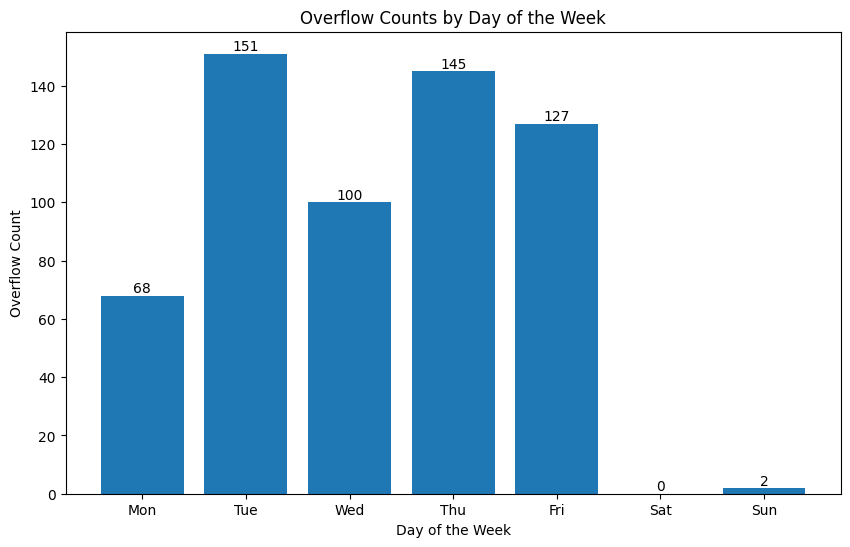

               Day of the Week  Total Overflow Count
Interval Start                                      
0                          Mon                    68
1                          Tue                   151
2                          Wed                   100
3                          Thu                   145
4                          Fri                   127
5                          Sat                     0
6                          Sun                     2


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset (replace 'path_to_overflow_columns.csv' with your actual file path)
df = pd.read_csv('/content/overflow_intervals.csv')

# Convert 'Interval Start' to datetime
df['Interval Start'] = pd.to_datetime(df['Interval Start'])

# Define custom 4-hour intervals
intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='1H').time
interval_labels = [f'{intervals[i]} to {intervals[i+1]}' for i in range(len(intervals) - 1)]

# Extract the time component and convert it to seconds since midnight
df['time_seconds'] = df['Interval Start'].dt.hour * 3600 + df['Interval Start'].dt.minute * 60 + df['Interval Start'].dt.second

# Create a new column for 4-hour interval grouping using seconds since midnight
# Convert intervals to seconds for binning
interval_seconds = [t.hour * 3600 + t.minute * 60 + t.second for t in intervals]
df['4_hour_interval'] = pd.cut(df['time_seconds'], bins=interval_seconds, labels=interval_labels, right=False)

# Calculate counts
df['Count_d'] = df.groupby('Interval Start')['Interval Start'].transform('size')
df['Count_m'] = df.groupby([df['Interval Start'].dt.year, df['Interval Start'].dt.month])['Interval Start'].transform('size')
df['Count_y'] = df.groupby(df['Interval Start'].dt.year)['Interval Start'].transform('size')

# Create the summary table
summary_table = df[['Interval Start', '4_hour_interval', 'Count_d', 'Count_m', 'Count_y']].drop_duplicates()

# Calculate total overflow count for each day of the week
day_counts = summary_table['Interval Start'].dt.dayofweek.value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Reindex day_counts to ensure all days of the week are included
day_counts = day_counts.reindex(range(7), fill_value=0)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(days, day_counts) # Plot using the reindexed day_counts

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Overflow Count')
plt.title('Overflow Counts by Day of the Week')

# Annotate the bar graph with total counts
for i, count in enumerate(day_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Create a table to display the counts
day_counts_df = pd.DataFrame({'Day of the Week': days, 'Total Overflow Count': day_counts})
print(day_counts_df)

In [15]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('grouped_intervals.csv', parse_dates=['Interval Start'])

# Feature engineering
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.day
df['Hour'] = df['Interval Start'].dt.hour
df['Minute'] = df['Interval Start'].dt.minute

# Define features and target
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['Max Total']

# Handle missing values in the target variable (y)
# Option 1: Remove rows with missing target values
X = X[y.notna()]  # Keep only rows where 'Max Total' is not NaN
y = y[y.notna()]  # Keep corresponding target values

# Option 2: Impute missing values (replace NaNs with a reasonable value)
# For example, you could replace NaNs with the mean:
# y.fillna(y.mean(), inplace=True)
X.shape
y.shape
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Train and predict with each model
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')

# Use RandomForest for final prediction
final_model = RandomForestRegressor()
final_model.fit(X_train_scaled, y_train)

# Predict for the upcoming month
future_dates = pd.date_range(start=df['Interval Start'].max(), periods=30, freq='10T')
future_df = pd.DataFrame({'Interval Start': future_dates})
future_df['Year'] = future_df['Interval Start'].dt.year
future_df['Month'] = future_df['Interval Start'].dt.month
future_df['Day'] = future_df['Interval Start'].dt.day
future_df['Hour'] = future_df['Interval Start'].dt.hour
future_df['Minute'] = future_df['Interval Start'].dt.minute

X_future = future_df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
X_future_scaled = scaler.transform(X_future)
future_df['Predicted Max Total'] = final_model.predict(X_future_scaled)
future_df['Status'] = np.where(future_df['Predicted Max Total'] >= 1, 'Overflow', 'Normal')
future_df.to_csv('future_predictions.csv', index=False)
 # 0Save overflow predictions to a separate CSV file
overflow_df = future_df[future_df['Status'] == 'Overflow']
overflow_df.to_csv('overflow_predictions.csv', index=False)

# Count the number of overflow instances
overflow_count = overflow_df.shape[0]
print(f'Number of overflow instances: {overflow_count}')

# Save all predictions
future_df.to_csv('future_predictions.csv', index=False)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


RandomForest MSE: 0.00851043539287771
LinearRegression MSE: 0.03807131696598679


KeyboardInterrupt: 

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Metrics:')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print('')

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print_metrics(y_test, y_pred, name)


RandomForest Metrics:
MSE: 0.008505338247033896
RMSE: 0.09222439073820925
MAE: 0.05814811211126879
R²: 0.7848317795027546

LinearRegression Metrics:
MSE: 0.03807131696598679
RMSE: 0.19511872530843058
MAE: 0.14467014123261165
R²: 0.036871046672987795

SVR Metrics:
MSE: 0.023213898042225657
RMSE: 0.1523610778454447
MAE: 0.10553773107854622
R²: 0.41273433372363855

KNeighbors Metrics:
MSE: 0.015473715365299397
RMSE: 0.12439338955627585
MAE: 0.08235788933204496
R²: 0.6085456329977885

DecisionTree Metrics:
MSE: 0.014303155528957775
RMSE: 0.11959580063262161
MAE: 0.07051800406606036
R²: 0.6381584796190276

GradientBoosting Metrics:
MSE: 0.01954416628821491
RMSE: 0.1398004516738587
MAE: 0.09578388874742183
R²: 0.5055712825055512

MLP Metrics:
MSE: 0.02017517935966932
RMSE: 0.14203935848795332
MAE: 0.09770113662753488
R²: 0.48960790095012674

XGBoost Metrics:
MSE: 0.01070753141831126
RMSE: 0.10347720240860428
MAE: 0.06838036109084711
R²: 0.7291206517271862

LightGBM Metrics:
MSE: 0.0123455759

The higher the R², the better the model1.
R² measures the proportion of variation in the outcome (dependent variable) that is explained by the predictor variables.

RMSE measures the average error performed by the model in predicting the outcome for an observation.
Lower RMSE indicates better model performance

RSE (also known as the model sigma) is a variant of RMSE adjusted for the number of predictors in the model.
Similar to RMSE, lower RSE values indicate better model performance1.

MAE measures the prediction error.
It is the average absolute difference between observed and predicted outcomes.
MAE is less sensitive to outliers compared to RMSE1.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, f1_score, recall_score, precision_score
import numpy as np

# Load the dataset
df = pd.read_csv('grouped_intervals.csv', parse_dates=['Interval Start'])

# Feature engineering
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.day
df['Hour'] = df['Interval Start'].dt.hour
df['Minute'] = df['Interval Start'].dt.minute

# Define features and target
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['Max Total']

# Handle missing values in the target variable (y)
X = X[y.notna()]  # Keep only rows where 'Max Total' is not NaN
y = y[y.notna()]  # Keep corresponding target values


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Convert regression output to binary classification
    y_true_class = (y_true >= 1).astype(int)
    y_pred_class = (y_pred >= 1).astype(int)

    f1 = f1_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class)
    tn, fp, fn, tp = confusion_matrix(y_true_class, y_pred_class).ravel()
    specificity = tn / (tn + fp)

    print(f'{model_name} Metrics:')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print('')

# Train and predict with each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print_metrics(y_test, y_pred, name)


RandomForest Metrics:
MSE: 0.008505226538152912
RMSE: 0.09222378509990203
MAE: 0.05816097562104733
R²: 0.7848346055163049
F1 Score: 0.6086956521739131
Recall: 0.4846153846153846
Precision: 0.8181818181818182
Specificity: 0.9985434873075323

LinearRegression Metrics:
MSE: 0.03807131696598679
RMSE: 0.19511872530843058
MAE: 0.14467014123261165
R²: 0.036871046672987795
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVR Metrics:
MSE: 0.023213898042225657
RMSE: 0.1523610778454447
MAE: 0.10553773107854622
R²: 0.41273433372363855
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0

KNeighbors Metrics:
MSE: 0.015473715365299397
RMSE: 0.12439338955627585
MAE: 0.08235788933204496
R²: 0.6085456329977885
F1 Score: 0.28402366863905326
Recall: 0.18461538461538463
Precision: 0.6153846153846154
Specificity: 0.9984394506866417

DecisionTree Metrics:
MSE: 0.014188705468102797
RMSE: 0.11911635264774857
MAE: 0.0704120728300041
R²: 0.6410538395935184
F1 Score: 0.622568093385214
Recall: 0.6153846153846154
Precision: 0.6299212598425197
Specificity: 0.995110278818144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoosting Metrics:
MSE: 0.019544166288214912
RMSE: 0.13980045167385874
MAE: 0.09578388874742183
R²: 0.505571282505551
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Metrics:
MSE: 0.020620853735817183
RMSE: 0.14359962999888679
MAE: 0.1020380668133626
R²: 0.47833322148980095
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0

XGBoost Metrics:
MSE: 0.01070753141831126
RMSE: 0.10347720240860428
MAE: 0.06838036109084711
R²: 0.7291206517271862
F1 Score: 0.38372093023255816
Recall: 0.25384615384615383
Precision: 0.7857142857142857
Specificity: 0.9990636704119851

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 38966, number of used features: 5
[LightGBM] [Info] Start training from score 0.256310
LightGBM Metrics:
MSE: 0.012345575973532304
RMSE: 0.11111064743548345
MAE: 0.0741446690191994
R²: 0.6876813671502292
F1 Score: 0.38095238095238093
Recall: 0.24615384615384617
Precision: 0.8421052631578947
Specificity: 0.9993757802746567

CatBoost Metri

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import numpy as np

# Load the dataset
df = pd.read_csv('grouped_intervals.csv', parse_dates=['Interval Start'])

# Feature engineering
df['Interval Start'] = pd.to_datetime(df['Interval Start'])
df['Year'] = df['Interval Start'].dt.year
df['Month'] = df['Interval Start'].dt.month
df['Day'] = df['Interval Start'].dt.day
df['Hour'] = df['Interval Start'].dt.hour
df['Minute'] = df['Interval Start'].dt.minute

# Define features and target
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['Max Total']

# Handle missing values in the target variable (y)
X = X[y.notna()]  # Keep only rows where 'Max Total' is not NaN
y = y[y.notna()]  # Keep corresponding target values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Convert regression output to binary classification
    y_true_class = (y_true >= 1).astype(int)
    y_pred_class = (y_pred >= 1).astype(int)

    accuracy = accuracy_score(y_true_class, y_pred_class)
    f1 = f1_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class)
    precision = precision_score(y_true_class, y_pred_class)
    tn, fp, fn, tp = confusion_matrix(y_true_class, y_pred_class).ravel()
    specificity = tn / (tn + fp)

    print(f'{model_name} Metrics:')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print('')

# Train and predict with each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print_metrics(y_test, y_pred, name)


RandomForest Metrics:
MSE: 0.0085349357868725
RMSE: 0.09238471619739111
MAE: 0.05828017308391384
R²: 0.7840830203360761
Accuracy: 99.18%
F1 Score: 0.6153846153846154
Recall: 0.49230769230769234
Precision: 0.8205128205128205
Specificity: 0.9985434873075323

LinearRegression Metrics:
MSE: 0.03807131696598679
RMSE: 0.19511872530843058
MAE: 0.14467014123261165
R²: 0.036871046672987795
Accuracy: 98.67%
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVR Metrics:
MSE: 0.023213898042225657
RMSE: 0.1523610778454447
MAE: 0.10553773107854622
R²: 0.41273433372363855
Accuracy: 98.67%
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0

KNeighbors Metrics:
MSE: 0.015473715365299397
RMSE: 0.12439338955627585
MAE: 0.08235788933204496
R²: 0.6085456329977885
Accuracy: 98.76%
F1 Score: 0.28402366863905326
Recall: 0.18461538461538463
Precision: 0.6153846153846154
Specificity: 0.9984394506866417

DecisionTree Metrics:
MSE: 0.014263469411271882
RMSE: 0.11942976769328442
MAE: 0.07048216899733113
R²: 0.6391624598339116
Accuracy: 99.00%
F1 Score: 0.622568093385214
Recall: 0.6153846153846154
Precision: 0.6299212598425197
Specificity: 0.995110278818144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoosting Metrics:
MSE: 0.019544166288214915
RMSE: 0.13980045167385874
MAE: 0.09578388874742183
R²: 0.505571282505551
Accuracy: 98.67%
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Metrics:
MSE: 0.020750474377604713
RMSE: 0.1440502494881724
MAE: 0.10187335875017793
R²: 0.4750540758493722
Accuracy: 98.67%
F1 Score: 0.0
Recall: 0.0
Precision: 0.0
Specificity: 1.0

XGBoost Metrics:
MSE: 0.01070753141831126
RMSE: 0.10347720240860428
MAE: 0.06838036109084711
R²: 0.7291206517271862
Accuracy: 98.91%
F1 Score: 0.38372093023255816
Recall: 0.25384615384615383
Precision: 0.7857142857142857
Specificity: 0.9990636704119851

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 38966, number of used features: 5
[LightGBM] [Info] Start training from score 0.256310
LightGBM Metrics:
MSE: 0.012345575973532304
RMSE: 0.11111064743548345
MAE: 0.0741446690191994
R²: 0.6876813671502292
Accuracy: 98.93%
F1 Score: 0.380952380